# Anaylsing ARF patients using structured/tabular data.
We only consider patients with acute renal failure (ARF) with "Primary" priority.

In [1]:
import sys
sys.path.append("../../")

import os
import json
from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from projects.data_cleaning import *

os.makedirs("_cache", exist_ok=True)

RAW_DATA_DIR = '/data/raw_json_data_v1/'
DATA_DIR = '/data/structured_json_data_v1/'

In [2]:
info_files = [os.path.join(DATA_DIR, i) for i in sorted(os.listdir(DATA_DIR)) if 'info' in i]
data_files = [os.path.join(DATA_DIR, i) for i in sorted(os.listdir(DATA_DIR)) if 'data' in i]
print(f"{len(info_files)} info_files and {len(data_files)} data_files are found.")

data_mapping = pd.read_csv('../../'+DATA_MAPPING_TSV_FILE, sep='\t', header=0)

uid_new_map = data_mapping[['TableUID', 'ParamNameNew']]
uid_new_map = uid_new_map.drop_duplicates()
uid_new_map = {uid_new_map.iloc[i, 0]: uid_new_map.iloc[i, 1]
               for i in range(uid_new_map.shape[0])}

uid_ori_map = data_mapping[['TableUID', 'ParamNameOrigin']]
uid_ori_map = uid_ori_map.drop_duplicates()
uid_ori_map = {uid_ori_map.iloc[i, 0]: uid_ori_map.iloc[i, 1]
               for i in range(uid_ori_map.shape[0])}

uid_lab_map = data_mapping[['TableUID', 'ParamLabel']]
uid_lab_map = uid_lab_map.drop_duplicates()
uid_lab_map = {uid_lab_map.iloc[i, 0]: uid_lab_map.iloc[i, 1]
               for i in range(uid_lab_map.shape[0])}

43540 info_files and 43540 data_files are found.


In [ ]:
load_dsv(data_files[0])

In [ ]:
primary_arf_pids = []

primary_arf_pids
for i in data_files:
    data = load_dsv(i)
    

# Inspect single patient

rng : 9384
PID: 1590692, HID: 1231277, discharge status: Alive


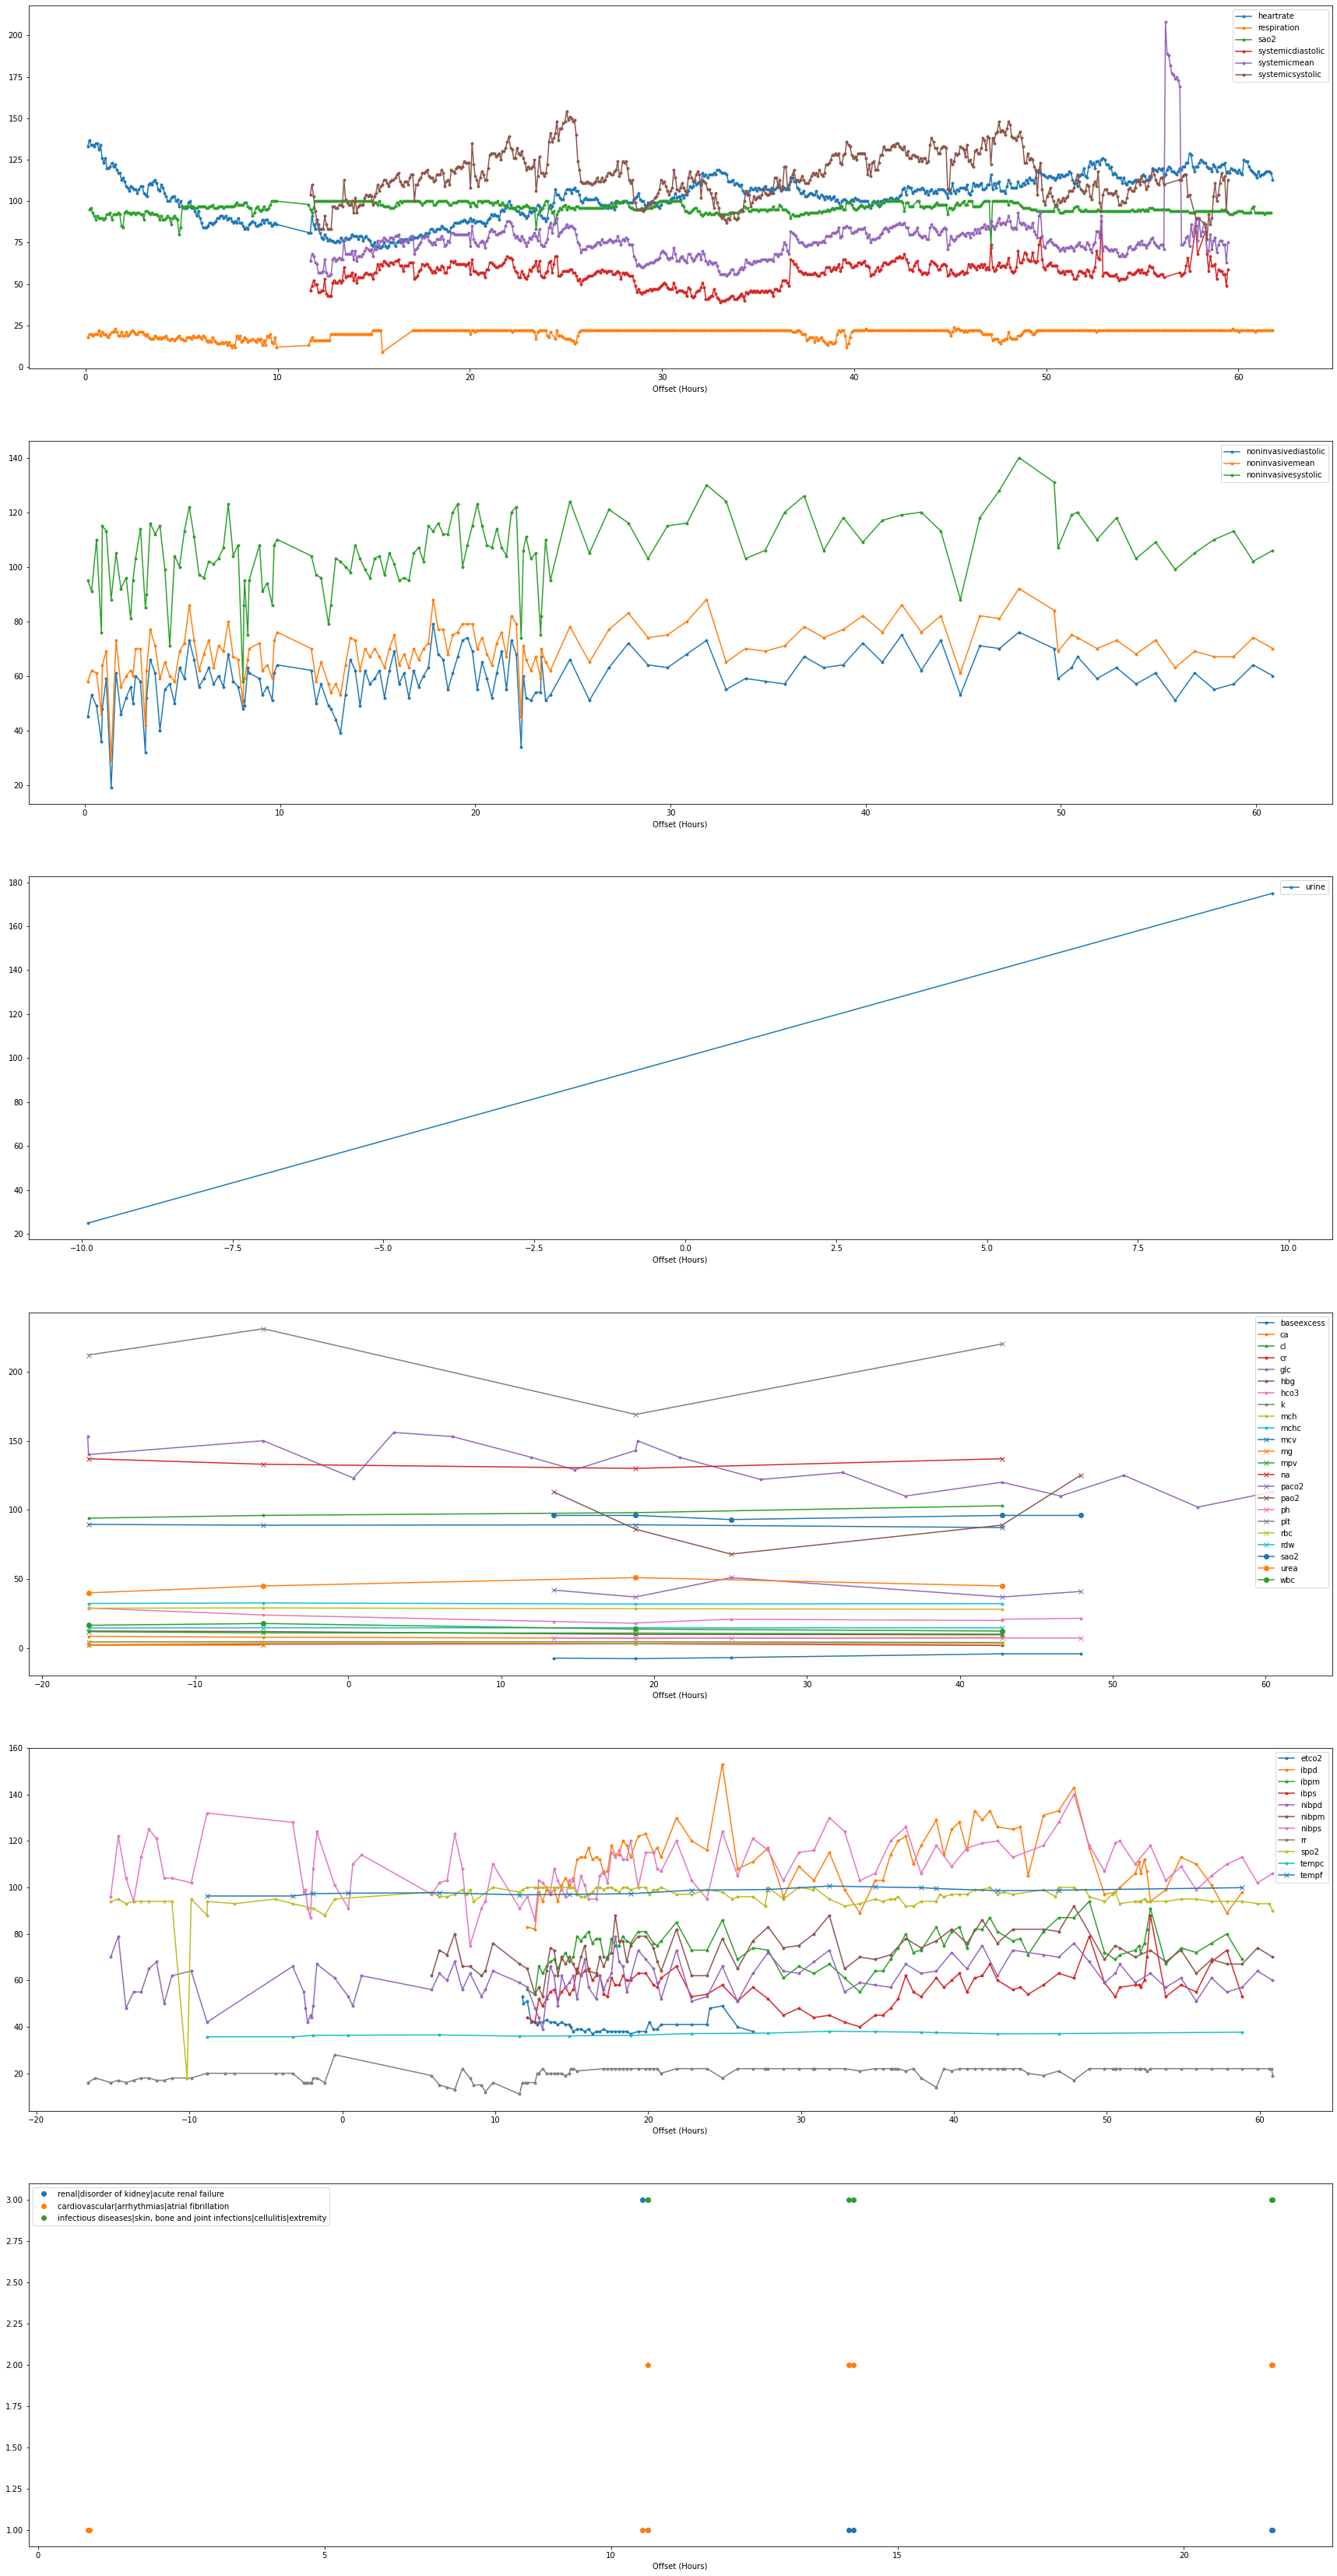

In [52]:
# Interesting PIDs: 3012, 42958, 7766
rng = np.random.randint(len(info_files))
print("rng :", rng)

info = load_dsv(info_files[rng])
# for i in info.iterrows():
#     print(f"{uid_ori_map[i[1]['UID']]:30} : {i[1]['Value']}")

pid = int(float(info.iloc[0, 1]))
hid = int(float(info.iloc[1, 1]))
discharge_status = info.iloc[27, 1]
print(f"PID: {pid}, HID: {hid}, discharge status: {discharge_status}")

data = load_dsv(data_files[rng])

ts = [i/60 for i in data['Offset'].to_list()]
xs = data['UID'].to_list()
ys = data['Value'].to_list()

unique_xs = np.unique(data['UID'].to_list())
unique_groups = np.unique([i//100000 for i in unique_xs])

fig, axes = plt.subplots(
    len(unique_groups), figsize=(30, 10*len(unique_groups)))

group, plot_idx, c = 1, 0, 0
legends = []
for idx, i in enumerate(unique_xs):

    if group == 7:
        legends.append(uid_lab_map[i])
        fmt = 'o'
    else:
        legends.append(uid_new_map[i])
        if c//10 == 0:
            fmt = '.-'
        elif c//10 == 1:
            fmt = 'x-'
        else:
            fmt = 'o-'

    x = np.array(ts)[np.where(xs == i)]
    y = np.array(ys)[np.where(xs == i)]

    axes[plot_idx].plot(x, y, fmt)
    axes[plot_idx].set_xlabel("Offset (Hours)")

    if idx == len(unique_xs) - 1:
        axes[plot_idx].legend(legends)
    else:
        if unique_xs[idx+1]//100000 != group:
            axes[plot_idx].legend(legends)
            group = unique_xs[idx+1]//100000
            plot_idx += 1
            legends = []
            c = -1

    c += 1


In [61]:
# _data = load_patient_data_by_id(RAW_DATA_DIR, pid)
# print(max(_data['vitalPeriodic']['observationoffset'])/60)
# print(max(_data['vitalAperiodic']['observationoffset'])/60)
# print(max(_data['intakeOutput']['intakeoutputoffset'])/60)
# print(max(_data['lab']['labresultoffset'])/60)
# print(max(_data['nurseCharting']['nursingchartoffset'])/60)

In [60]:
# subset_idx = select_entry_subset(_data, 'intakeOutput', 'celllabel', 'Urine')
# sorted_ids = np.argsort(np.array(_data['intakeOutput']['intakeoutputoffset'])[subset_idx])
# urine = np.array(select_list_subset_with_index(_data['intakeOutput']['cellvaluenumeric'], subset_idx))[sorted_ids]
# urine_offset = np.array(_data['intakeOutput']['intakeoutputoffset'])[subset_idx][sorted_ids]
# urine, urine_offset